In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import sidetable
import pandas_profiling
import missingno as msno
from ipywidgets import interact, widgets

from sklearn import datasets
from sklearn.preprocessing import scale, minmax_scale, power_transform

In [2]:
df,_ = datasets.load_wine(return_X_y=True, as_frame=True)
print(df.shape)

(178, 13)


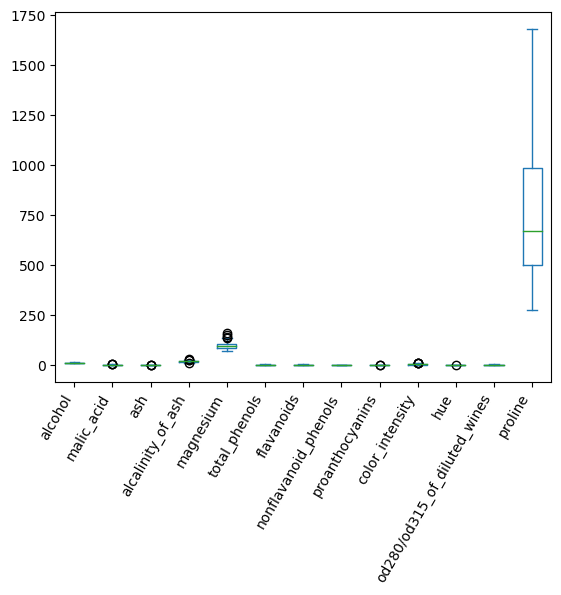

In [3]:
# meio mais rapida de ver outlairs seria com boxplot / The quickest way to see outlairs would be with boxplot
df.plot.box()
plt.xticks(rotation=60, ha='right');

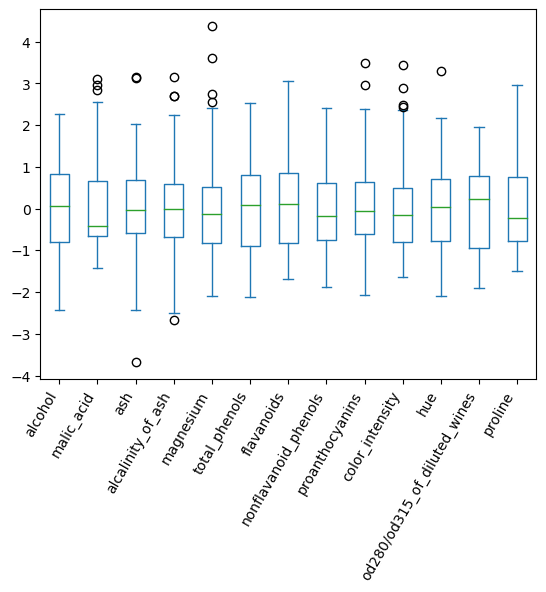

In [4]:
# maneiro mais rapida de ver outlairs seria com boxplot - agora com padronização
#The quickest way to see outlairs would be with boxplot - now with standardization
from sklearn.preprocessing import scale, minmax_scale, power_transform
df.apply(scale).plot.box()
plt.xticks(rotation=60, ha='right');

# encontramos os outlairs - mas devemos tirar? faz sentido estas informações?
# we found the outlairs - but should we take them out? Does this information make sense?

In [5]:
# Function to find outleiar - 
def is_outlier(array, extreme=False):
  """Custom function to identify outliers in an array"""
  q1,q3 = np.quantile(array, [.25,.75])
  iqr = q3-q1
  
  factor = 3. if extreme else 1.5
  upper_outlier = q3 + factor*iqr
  lower_outlier = q1 - factor*iqr

  return (array < lower_outlier) | (array > upper_outlier)

In [6]:
is_outlier(df.ash)


0      False
1      False
2      False
3      False
4      False
       ...  
173    False
174    False
175    False
176    False
177    False
Name: ash, Length: 178, dtype: bool

In [7]:
is_outlier(df.ash).sum() #coluna ash, qual os outleirs? / ash column, which are the outleirs?

3

In [8]:
df.apply(is_outlier)# apply mostra para todas as colunas / shows for all columns

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,False,True,False,False,False,False,False,False,False,False,False,False,False
174,False,False,False,False,False,False,False,False,False,False,False,False,False
175,False,False,False,False,False,False,False,False,False,False,False,False,False
176,False,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
df.apply(is_outlier).sum() #identifica quantos outliers / identifies how many outliers

alcohol                         0
malic_acid                      3
ash                             3
alcalinity_of_ash               4
magnesium                       4
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 2
color_intensity                 4
hue                             1
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

In [10]:
# removing outliers
df.apply(is_outlier).any(axis=0) #por coluna

alcohol                         False
malic_acid                       True
ash                              True
alcalinity_of_ash                True
magnesium                        True
total_phenols                   False
flavanoids                      False
nonflavanoid_phenols            False
proanthocyanins                  True
color_intensity                  True
hue                              True
od280/od315_of_diluted_wines    False
proline                         False
dtype: bool

In [11]:
# removing outliers
df.apply(is_outlier).any(axis=1) #by line

0      False
1      False
2      False
3      False
4      False
       ...  
173     True
174    False
175    False
176    False
177    False
Length: 178, dtype: bool

In [12]:
#filtrando outliers - selecionando / filtering outliers - selecting
df[df.apply(is_outlier).any(axis=1)]

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
25,13.05,2.05,3.22,25.0,124.0,2.63,2.68,0.47,1.92,3.58,1.13,3.20,830.0
59,12.37,0.94,1.36,10.6,88.0,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520.0
69,12.21,1.19,1.75,16.8,151.0,1.85,1.28,0.14,2.50,2.85,1.28,3.07,718.0
73,12.99,1.67,2.60,30.0,139.0,3.30,2.89,0.21,1.96,3.35,1.31,3.50,985.0
78,12.33,0.99,1.95,14.8,136.0,1.90,1.85,0.35,2.76,3.40,1.06,2.31,750.0
95,12.47,1.52,2.20,19.0,162.0,2.50,2.27,0.32,3.28,2.60,1.16,2.63,937.0
110,11.46,3.74,1.82,19.5,107.0,3.18,2.58,0.24,3.58,2.90,0.75,2.81,562.0
115,11.03,1.51,2.20,21.5,85.0,2.46,2.17,0.52,2.01,1.90,1.71,2.87,407.0
121,11.56,2.05,3.23,28.5,119.0,3.18,5.08,0.47,1.87,6.00,0.93,3.69,465.0
123,13.05,5.80,2.13,21.5,86.0,2.62,2.65,0.30,2.01,2.60,0.73,3.10,380.0


In [13]:
# removing outliers - filtering
df[~df.apply(is_outlier).any(axis=1)]

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,14.16,2.51,2.48,20.0,91.0,1.68,0.70,0.44,1.24,9.70,0.62,1.71,660.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


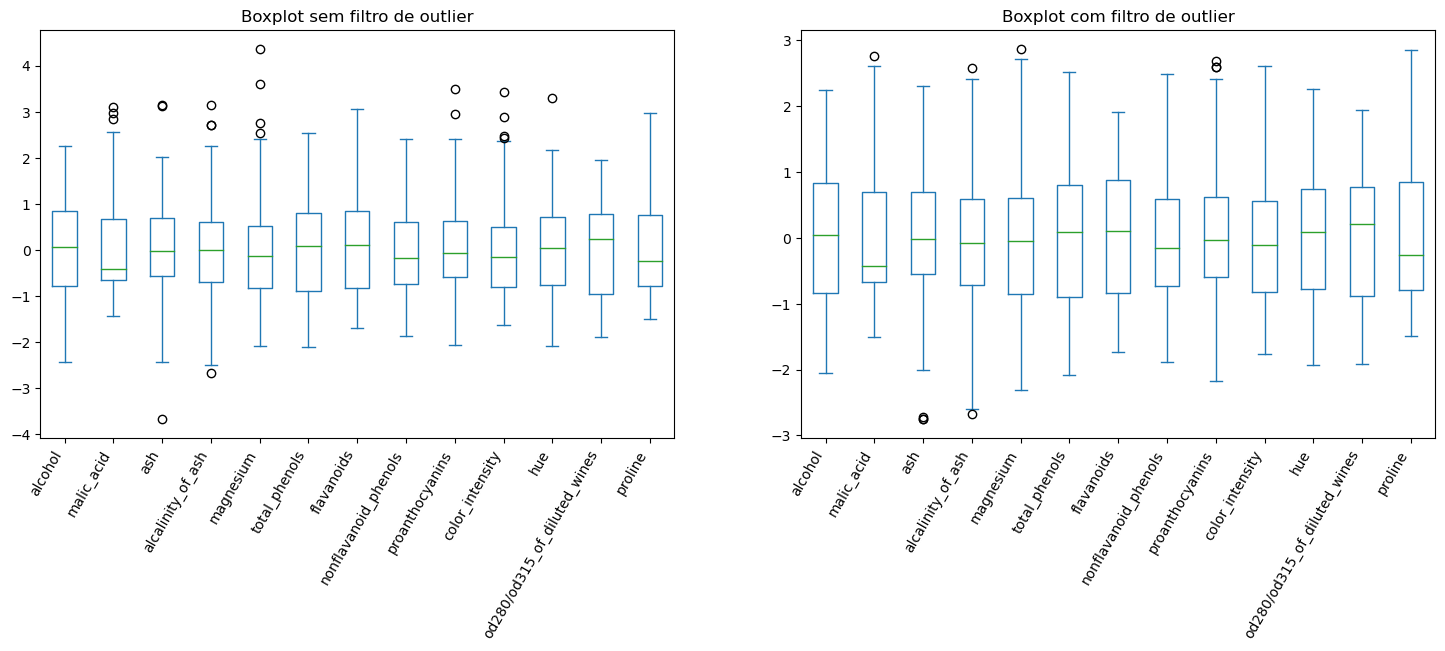

In [17]:

# Figura lado a lado dos dados originais padronizados:
# Side-by-side figure of the original standardized data:

df_without_outliers = df[~df.apply(is_outlier).any(axis=1)]

fig, axes = plt.subplots(ncols=2, figsize=(18, 6))

df.apply(scale).plot.box(ax=axes[0], title='Boxplot sem filtro de outlier')
df_without_outliers.apply(scale).plot.box(ax=axes[1], title='Boxplot com filtro de outlier')
fig.autofmt_xdate(rotation=60, ha='right')
plt.show()

In [20]:
#Z-Score

def zscore_outlier(array):
    scale_array = scale(array)
    return (scaled_array<-3) | (scaled_array>3)
df_without_outliers = df[~df.apply(is_outlier).any(axis=1)]

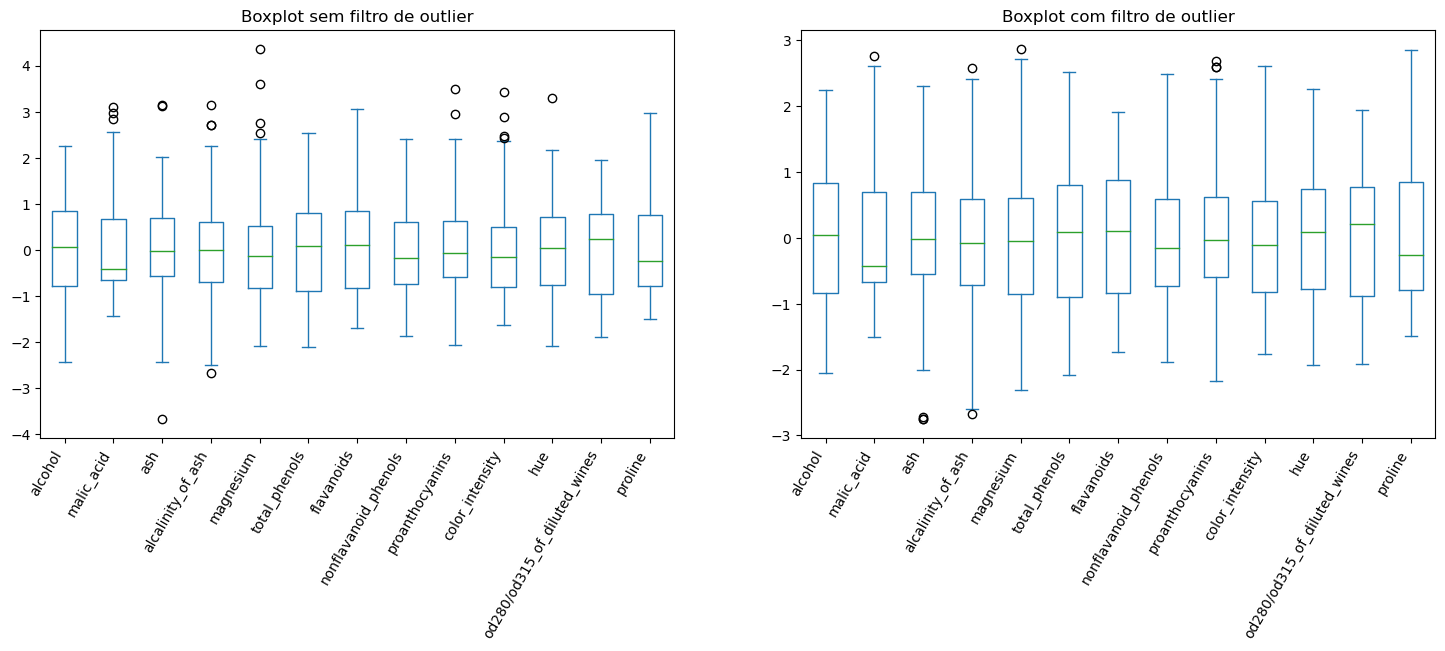

In [21]:
fig, axes = plt.subplots(ncols=2, figsize=(18, 6))

df.apply(scale).plot.box(ax=axes[0], title='Boxplot sem filtro de outlier')
df_without_outliers.apply(scale).plot.box(ax=axes[1], title='Boxplot com filtro de outlier')
fig.autofmt_xdate(rotation=60, ha='right')
plt.show()

# Corrigindo Outliers / Correcting Outliers

### CAP

In [23]:
# Mostrando percentis / Showing Percentiles
df.describe(percentiles=[.01, .25, .5, .75, .9, .99])

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
1%,11.440800,0.897700,1.700000,11.354000,78.000000,1.138500,0.470000,0.140000,0.420000,1.863200,0.547700,1.290000,306.940000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
90%,14.100000,3.983000,2.700000,24.000000,118.000000,3.044000,3.233000,0.530000,2.305000,8.530000,1.233000,3.456000,1261.500000
99%,14.472800,5.542200,2.989000,28.500000,141.760000,3.595900,3.791400,0.630000,3.033600,11.018500,1.426900,3.843000,1522.360000


In [24]:
def cap_values(array, lower_quantile=0., upper_quantile=1.):
  array = array.copy()
  
  lower_quantile = np.quantile(array, lower_quantile)
  upper_quantile = np.quantile(array, upper_quantile)
  
  array[array<lower_quantile] = lower_quantile
  array[array>upper_quantile] = upper_quantile
  
  return array

In [25]:
cap_values(df.ash, upper_quantile=.90).max()

2.7

In [27]:
df.apply(cap_values, upper_quantile=.99).describe(percentiles=[.01, .25, .5, .75, .9, .99])

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,12.997054,2.334294,2.363865,19.486517,99.575955,2.292089,2.021252,0.361685,1.586445,5.042848,0.955729,2.610371,745.869213
std,0.804575,1.111002,0.267036,3.314706,13.680946,0.618829,0.979667,0.124067,0.559125,2.272948,0.223969,0.707571,312.129198
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
1%,11.440800,0.897700,1.700000,11.354000,78.000000,1.138500,0.470000,0.140000,0.420000,1.863200,0.547700,1.290000,306.940000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
90%,14.100000,3.983000,2.700000,24.000000,118.000000,3.044000,3.233000,0.530000,2.305000,8.530000,1.233000,3.456000,1261.500000
99%,14.409044,5.517406,2.935870,28.500000,139.634800,3.537457,3.759522,0.630000,2.976928,10.850255,1.421587,3.825290,1516.692800


## LOG

In [28]:
np.log(df.ash) # selecionar uma coluna - log da coluna / select a column - column log

0      0.887891
1      0.760806
2      0.982078
3      0.916291
4      1.054312
         ...   
173    0.896088
174    0.908259
175    0.815365
176    0.862890
177    1.007958
Name: ash, Length: 178, dtype: float64

In [29]:
df.apply(np.log) #aplicar um scale de todas colunas / apply a scale to all columns

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,2.655352,0.536493,0.887891,2.747271,4.844187,1.029619,1.118415,-1.272966,0.828552,1.729884,0.039221,1.366092,6.970730
1,2.580217,0.576613,0.760806,2.415914,4.605170,0.974560,1.015231,-1.347074,0.246860,1.477049,0.048790,1.223775,6.956545
2,2.577182,0.858662,0.982078,2.923162,4.615121,1.029619,1.175573,-1.203973,1.033184,1.736951,0.029559,1.153732,7.077498
3,2.665143,0.667829,0.916291,2.821379,4.727388,1.348073,1.249902,-1.427116,0.779325,2.054124,-0.150823,1.238374,7.299797
4,2.583243,0.951658,1.054312,3.044522,4.770685,1.029619,0.989541,-0.941609,0.598837,1.463255,0.039221,1.075002,6.599870
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,2.618125,1.731656,0.896088,3.020425,4.553877,0.518794,-0.494296,-0.653926,0.058269,2.041220,-0.446287,0.553885,6.606650
174,2.595255,1.363537,0.908259,3.135494,4.624973,0.587787,-0.287682,-0.843970,0.343590,1.987874,-0.356675,0.444686,6.620073
175,2.585506,1.453953,0.815365,2.995732,4.787492,0.463734,-0.371064,-0.843970,0.300105,2.322388,-0.527633,0.444686,6.727432
176,2.577942,0.951658,0.862890,2.995732,4.787492,0.500775,-0.385662,-0.634878,0.378436,2.230014,-0.510826,0.482426,6.733402


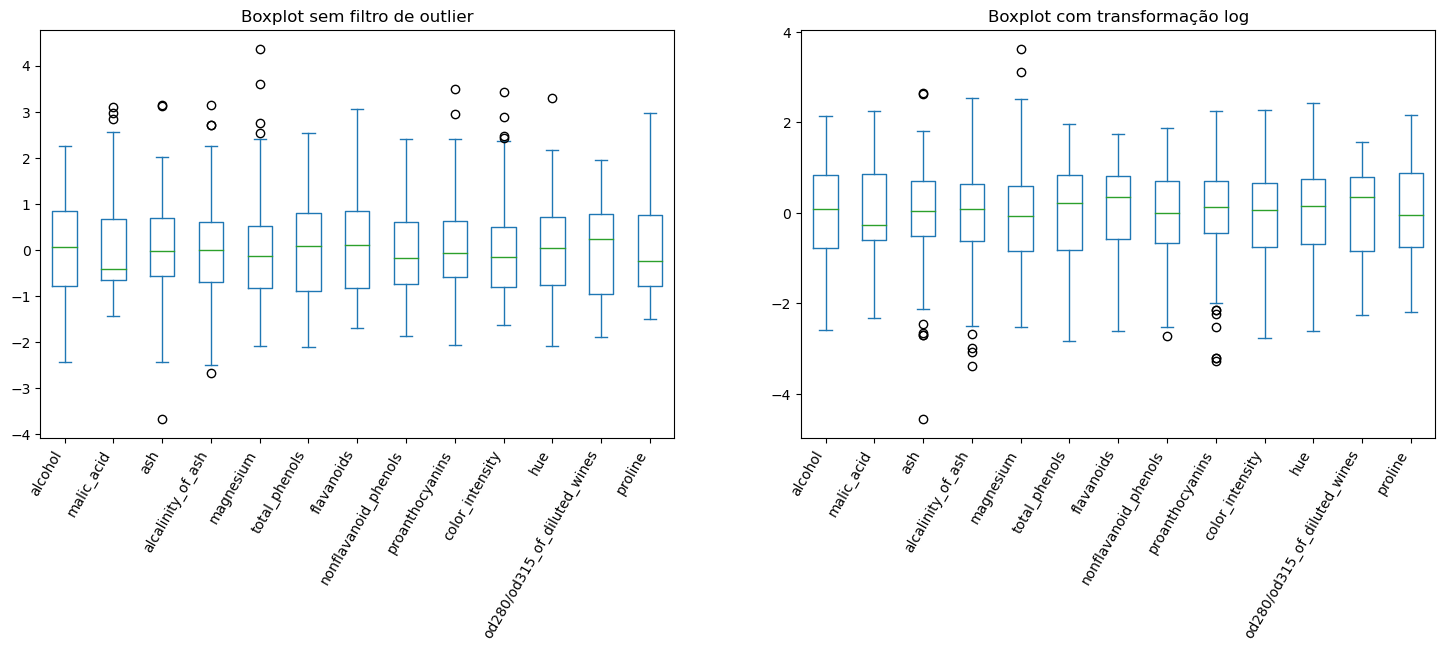

In [32]:
fig,axes = plt.subplots(ncols=2, figsize=(18,6))

df.apply(scale).plot.box(ax=axes[0], title='Boxplot sem filtro de outlier')
df.apply(np.log).apply(scale).plot.box(ax=axes[1], title='Boxplot com transformação log')

fig.autofmt_xdate(rotation=60, ha='right')
plt.show()

## BOX-COX

In [34]:
from sklearn.preprocessing import power_transform

In [37]:
power_transform(df[['ash']], method='box-cox')

array([[ 0.20965583],
       [-0.84042257],
       [ 1.12048779],
       [ 0.47151443],
       [ 1.90687536],
       [ 0.28414782],
       [ 0.28414782],
       [ 0.88935866],
       [-0.73446283],
       [-0.37675501],
       [-0.26810854],
       [-0.19533979],
       [ 0.13542548],
       [ 0.06145799],
       [ 0.02457322],
       [ 1.23689082],
       [ 1.31480096],
       [ 0.92772401],
       [ 0.39637369],
       [ 0.69847645],
       [-0.3406073 ],
       [ 1.04319542],
       [-0.0489976 ],
       [ 0.54691258],
       [ 0.88935866],
       [ 3.33976221],
       [ 0.92772401],
       [-0.84042257],
       [ 1.62888406],
       [-0.59220702],
       [ 1.23689082],
       [-0.0489976 ],
       [-0.0489976 ],
       [ 1.23689082],
       [ 1.04319542],
       [ 0.13542548],
       [ 1.78737706],
       [ 0.6604899 ],
       [-0.9807165 ],
       [ 0.5091814 ],
       [-0.23175783],
       [-0.91071098],
       [ 0.81281645],
       [-0.30439176],
       [-0.9807165 ],
       [ 0

In [38]:
pd.DataFrame(power_transform(df, method='box-cox'), columns=df.columns)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.529934,-0.419936,0.209656,-1.180096,1.690664,0.820429,1.017090,-0.590039,1.196442,0.448300,0.373318,1.995073,1.062489
1,0.238692,-0.324973,-0.840423,-2.662695,0.188122,0.594628,0.752148,-0.788009,-0.485294,-0.106644,0.416623,1.143947,1.029691
2,0.189069,0.313578,1.120488,-0.243599,0.261441,0.820429,1.172735,-0.402165,1.932988,0.463965,0.329965,0.782435,1.307819
3,1.707400,-0.112964,0.471514,-0.799368,1.020309,2.307762,1.385166,-0.997460,1.031657,1.175730,-0.414883,1.223784,1.810015
4,0.288354,0.513388,1.906875,0.472325,1.281944,0.820429,0.689251,0.344871,0.465369,-0.136613,0.373318,0.415598,0.188997
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.874837,2.000792,0.284148,0.325346,-0.206825,-0.980400,-1.501774,1.226708,-0.921725,1.146438,-1.404927,-1.225265,0.205267
174,0.487399,1.338849,0.396374,1.049814,0.333017,-0.772423,-1.319936,0.636572,-0.242658,1.025641,-1.131521,-1.443607,0.237447
175,0.325627,1.507756,-0.412835,0.177260,1.379224,-1.139458,-1.396657,0.636572,-0.353385,1.791258,-1.635008,-1.443607,0.493227
176,0.201471,0.513388,-0.012245,0.177260,1.379224,-1.033115,-1.409612,1.287532,-0.151934,1.577893,-1.588819,-1.371826,0.507368


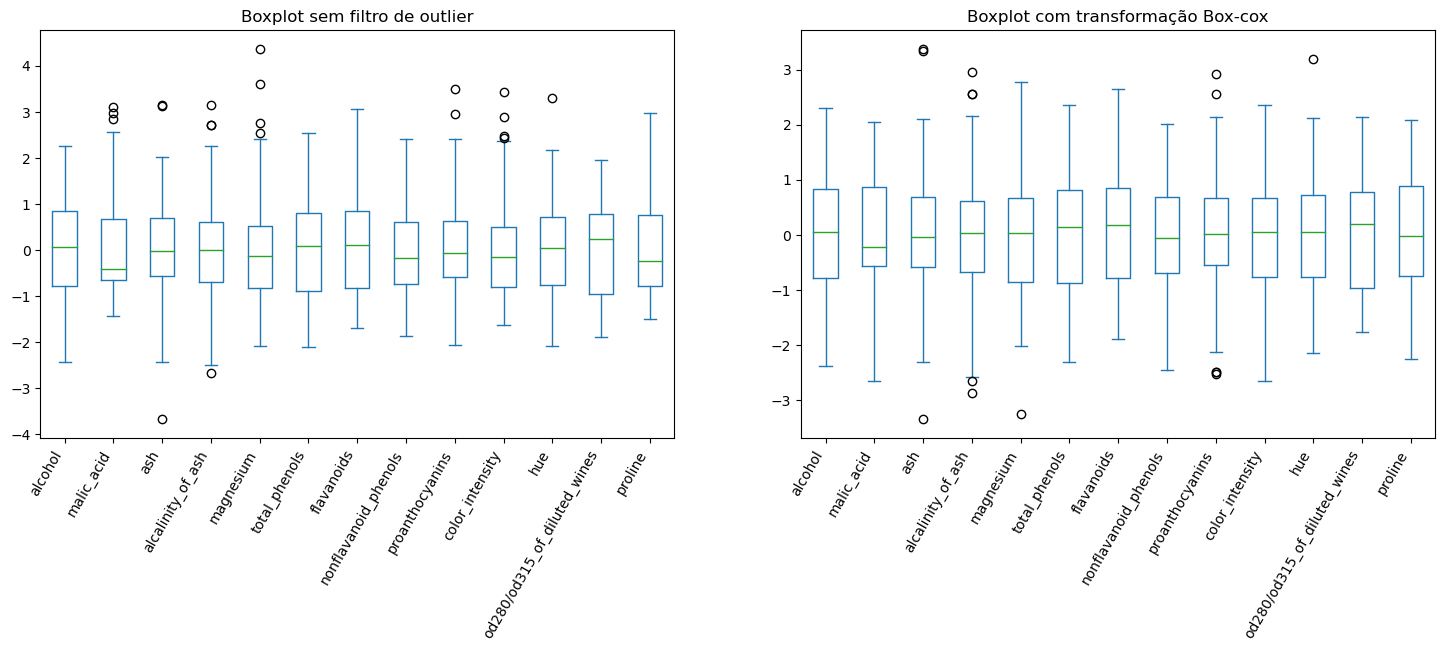

In [35]:
df_boxbox = pd.DataFrame(power_transform(df, method='box-cox'), columns=df.columns)

fig,axes = plt.subplots(ncols=2, figsize=(18,6))

df.apply(scale).plot.box(ax=axes[0], title='Boxplot sem filtro de outlier')
df_boxbox.plot.box(ax=axes[1], title='Boxplot com transformação Box-cox')

fig.autofmt_xdate(rotation=60, ha='right')
plt.show()